<a href="https://colab.research.google.com/github/SayantikaFSU/Projects/blob/main/LinearRegression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required packages

In [ ]:
install.packages('readxl')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('corrplot')
install.packages("GGally")

library(readxl)
library(ggplot2)
library(dplyr)
library(corrplot)
library(GGally)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# Student Performance Data Set

Read the data:

In [ ]:
data= read_excel('/content/Students_Performance.xlsx')
head(data)

gender,race_ethnicity,parent_educ_level,lunch,test_prep_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


Looking at the Students_Performance data set, explore the relationship
between the writing and reading scores and how the change in one variable (predictor)
****************************************************

Exploratory Data Analysis:

In [ ]:
#variable names and types:
str(data)

tibble [1,000 × 8] (S3: tbl_df/tbl/data.frame)
 $ gender           : chr [1:1000] "female" "female" "female" "male" ...
 $ race_ethnicity   : chr [1:1000] "group B" "group C" "group B" "group A" ...
 $ parent_educ_level: chr [1:1000] "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch            : chr [1:1000] "standard" "standard" "standard" "free/reduced" ...
 $ test_prep_course : chr [1:1000] "none" "completed" "none" "none" ...
 $ math_score       : num [1:1000] 72 69 90 47 76 71 88 40 64 38 ...
 $ reading_score    : num [1:1000] 72 90 95 57 78 83 95 43 64 60 ...
 $ writing_score    : num [1:1000] 74 88 93 44 75 78 92 39 67 50 ...


In [ ]:
summary(data)

    gender          race_ethnicity     parent_educ_level     lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 test_prep_course     math_score     reading_score    writing_score   
 Length:1000        Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
 Mode  :character   Median : 66.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
                    3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
                    Max.   :100.00 

In [ ]:
# data cleaning
sum(is.na(data))
## no null values

[1] 0

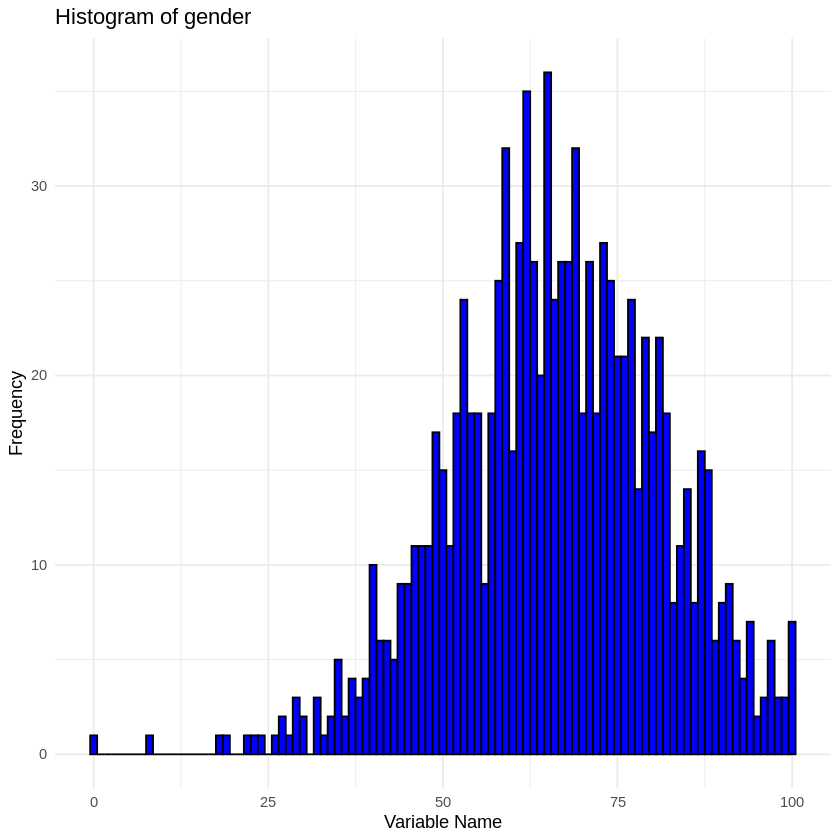

In [ ]:
# Histogram of a continuous variable
ggplot(data, aes(x = math_score)) +
  geom_histogram(binwidth = 1, fill = 'blue', color = 'black') +
  theme_minimal() +
  labs(title = 'Histogram of math_score', x = 'Variable Name', y = 'Frequency')


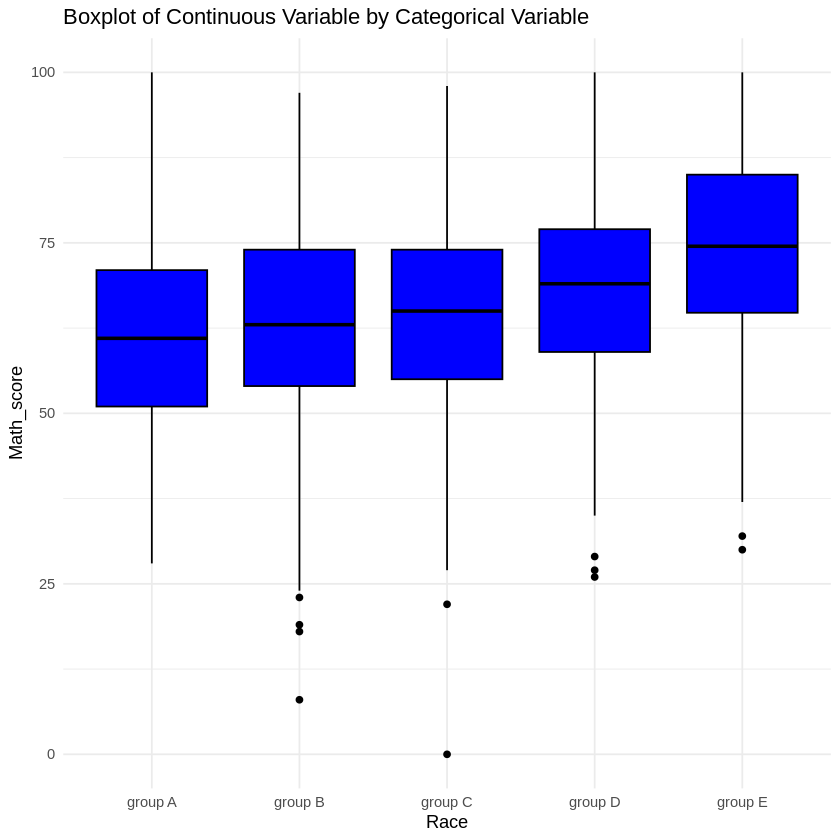

In [ ]:
# Boxplot
ggplot(data, aes(x = race_ethnicity, y = math_score)) +
  geom_boxplot(fill = 'blue', color = 'black') +
  theme_minimal() +
  labs(title = 'Boxplot of Continuous Variable by Categorical Variable', x = 'Race', y = 'Math_score')

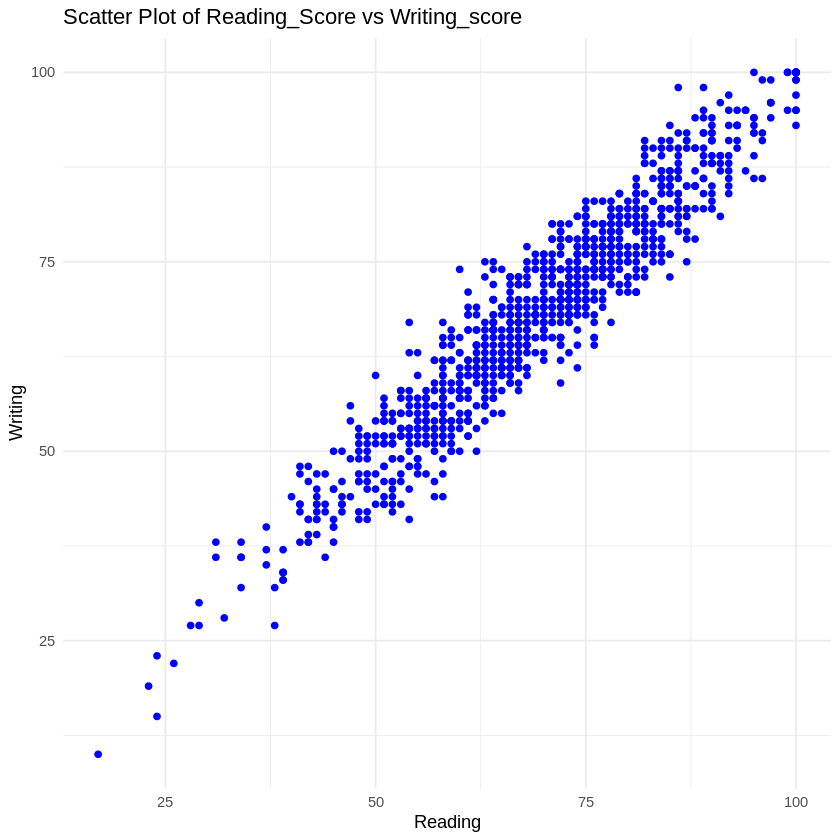

In [ ]:
# Scatter plot
ggplot(data, aes(x = reading_score, y = writing_score)) +
  geom_point(color = 'blue') +
  theme_minimal() +
  labs(title = 'Scatter Plot of Reading_Score vs Writing_score', x = 'Reading', y = 'Writing')

corrplot 0.92 loaded



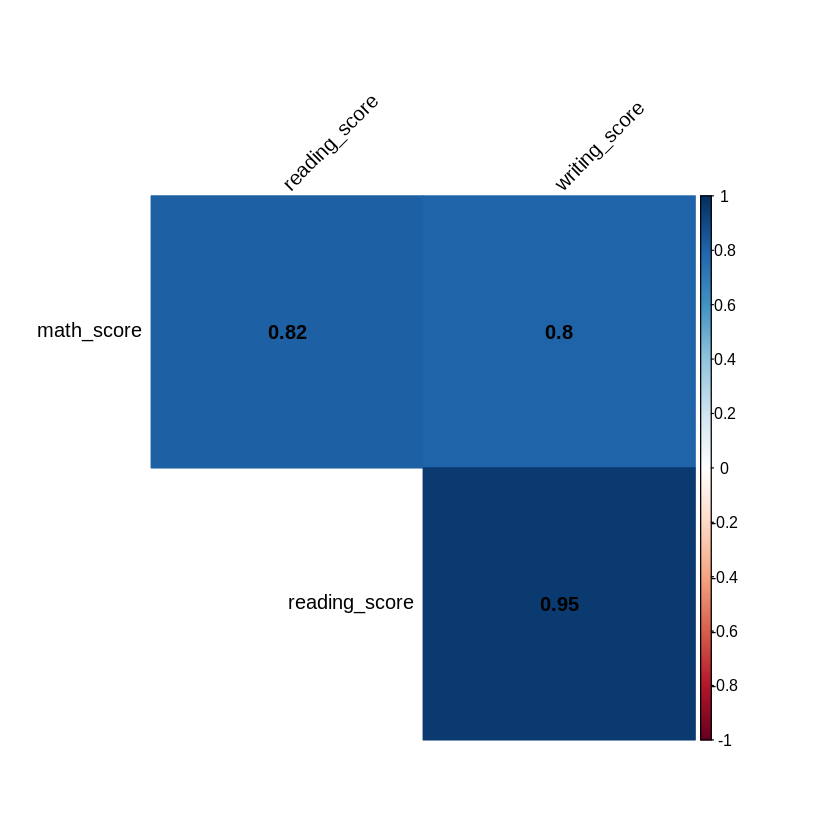

In [ ]:
## Find correlation between numeric columns
# Select only numeric columns
numeric_data <- data %>% select_if(is.numeric)

# Compute the correlation matrix
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Visualize the correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", # Add correlation coefficient values
         diag = FALSE) # Hide the diagonal

Observation :

* Initial explanatory data analysis shows high correlation between reading and writing score.

* Median math scores doesnot appear to differ much along different ethnicities

Linear Model
**********************************************************

Since there seems to have a linear relationship between the reading and writing scores, we try and fit a linear model

* X= Reading Score (predictor)
* Y= Writing Score (Outcome)


Call:
lm(formula = writing_score ~ reading_score, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9573  -2.9573   0.0363   3.1026  15.0557 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.667554   0.693792  -0.962    0.336    
reading_score  0.993531   0.009814 101.233   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.529 on 998 degrees of freedom
Multiple R-squared:  0.9113,	Adjusted R-squared:  0.9112 
F-statistic: 1.025e+04 on 1 and 998 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


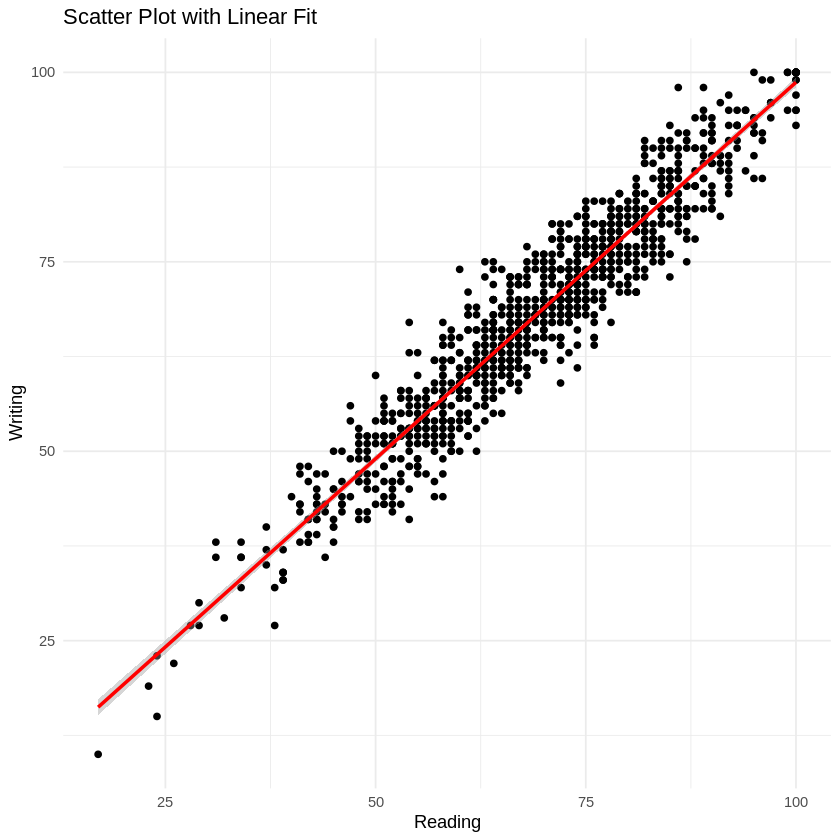

In [ ]:
data=read_excel('/content/Students_Performance.xlsx')
model=lm(writing_score~reading_score, data=data)
summary(model)

# Create a scatter plot with lm fit for two specific variables
ggplot(data, aes(x = reading_score, y = writing_score)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_minimal() +
  labs(title = "Scatter Plot with Linear Fit", x = "Reading", y = "Writing")

Observation:

* Prediction Equation :
writing_Score = 0.9935 Reading_score - 0.6676

* Correlation coefficient = Multiple R-squared = 0.911, which shows +ve high correlation between outcome and predictor and model fits and predicts 91.1 % accurately.

* Standard Error for predictor = 0.009814 which is very small, which implies that the predictor is 'significant'.


# Advertisment Sales Data:

In [ ]:
data= read_excel('/content/Advertisement_Sales.xlsx')
str(data)

tibble [200 × 2] (S3: tbl_df/tbl/data.frame)
 $ Ads_Spending : num [1:200] 37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Sales_Revenue: num [1:200] 22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


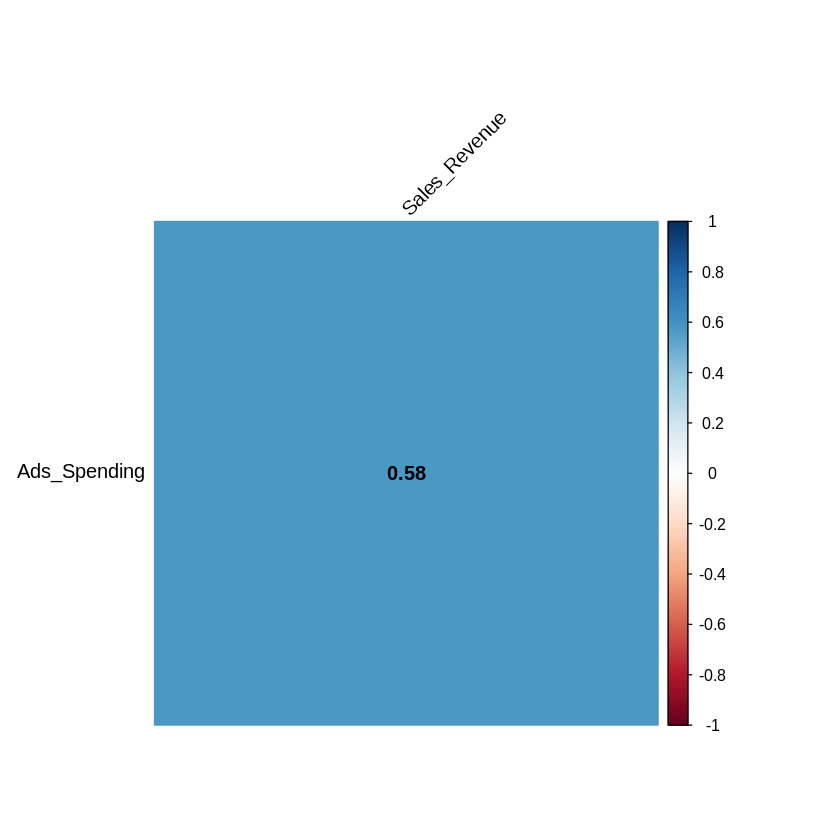

In [ ]:
## Find correlation between numeric columns
# Select only numeric columns
numeric_data <- data %>% select_if(is.numeric)

# Compute the correlation matrix
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Visualize the correlation matrix
library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", # Add correlation coefficient values
         diag = FALSE) # Hide the diagonal"

Predictor = Ads_Spending

Outcome = Sales_Revenue

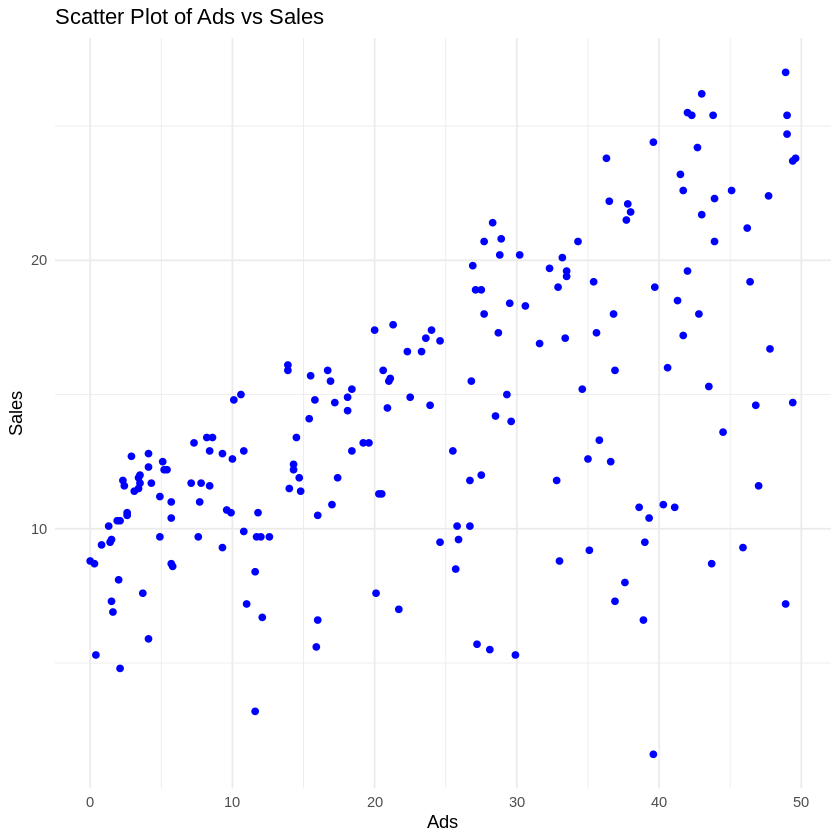

In [ ]:
# Scatter plot
ggplot(data, aes(x = Ads_Spending, y = Sales_Revenue)) +
  geom_point(color = 'blue') +
  theme_minimal() +
  labs(title = 'Scatter Plot of Ads vs Sales', x = 'Ads', y = 'Sales')

Observation : No clear linear relationship, however mostly the sales seems to increase as the Ads_revenue increases.


In [ ]:
data= read_excel('/content/Advertisement_Sales.xlsx')
model=lm(Sales_Revenue~Ads_Spending, data=data)
summary(model)


Call:
lm(formula = Sales_Revenue ~ Ads_Spending, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.31164    0.56290  16.542   <2e-16 ***
Ads_Spending  0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


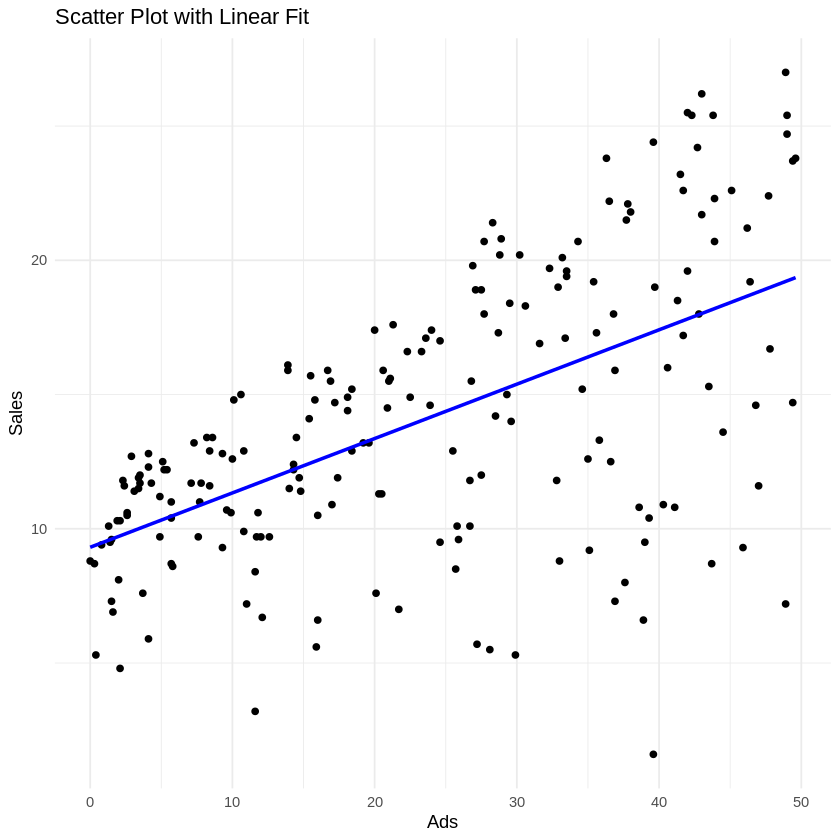

In [ ]:
# Create a scatter plot with lm fit for two specific variables
ggplot(data, aes(x = Ads_Spending, y = Sales_Revenue)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Scatter Plot with Linear Fit", x = "Ads", y = "Sales")

Observation:

* Prediction Equation :
Sales_Revenuw = 0.20250 Ads_Spending + 9.31164

* Correlation coefficient = Multiple R-squared = 0.33, which is not so high and explains 33% of the variability in the data

* Standard Error for predictor = 0.02041 which is small, and thus the predictor is 'significant'.
